<a href="https://colab.research.google.com/github/maushamkumar/Deep-learning-/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [53]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

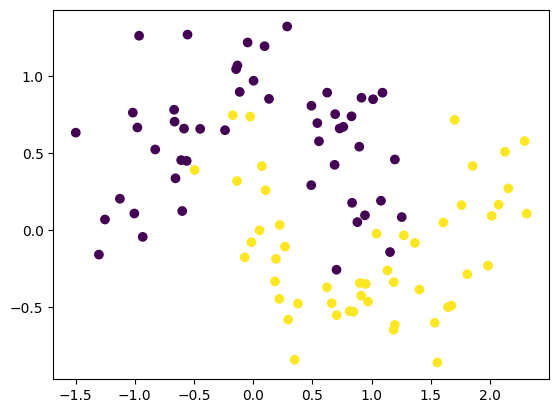

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [56]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               384       
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000,validation_split=0.2, verbose=0)

9600/9600 [==============================] - 30s 3ms/step


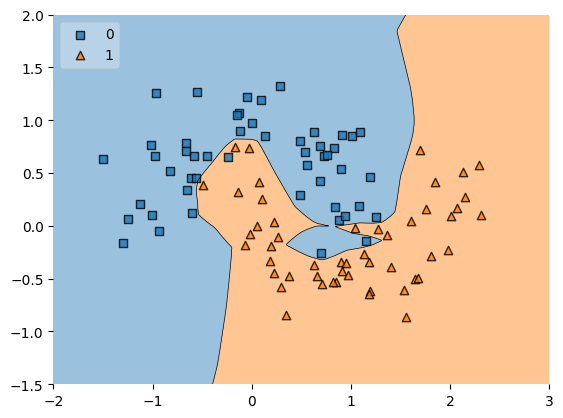

In [58]:
plot_decision_regions(X, y, clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

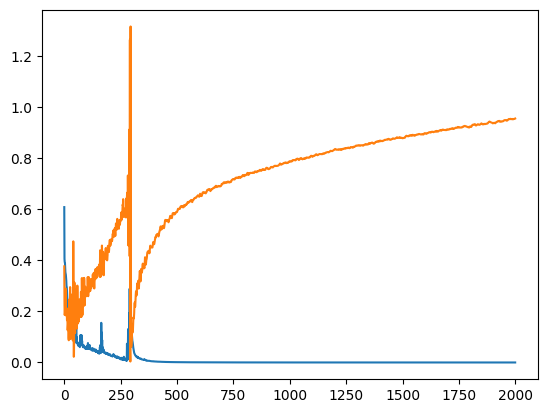

In [59]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [62]:
model2 = Sequential()
model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               384       
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000,validation_split=0.2, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


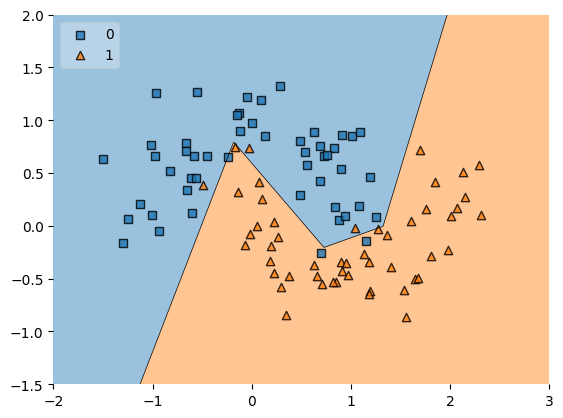

In [64]:
plot_decision_regions(X, y.astype(int), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

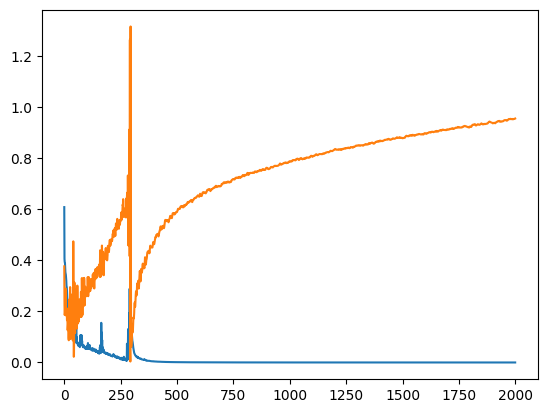

In [65]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [66]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

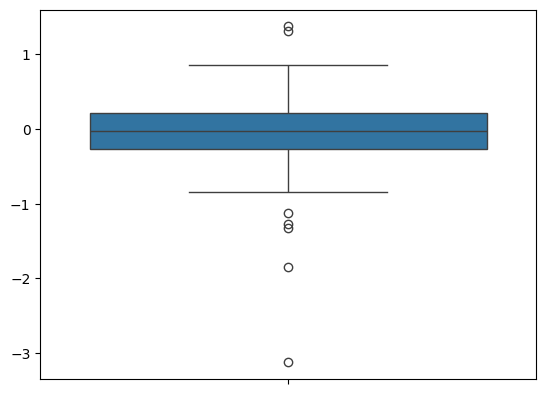

In [67]:
sns.boxplot(model1_weight_layer1)

<Axes: >

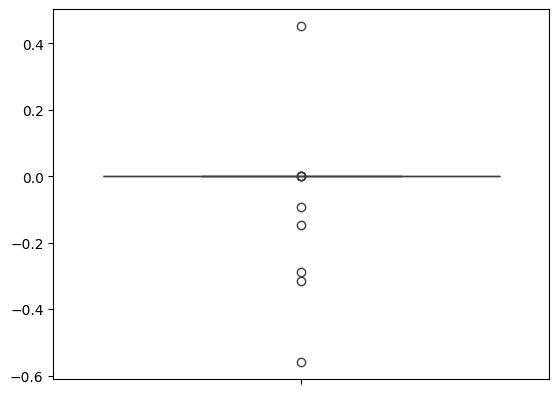

In [68]:
sns.boxplot(model2_weight_layer1)

In [69]:
model1_weight_layer1.min()

-3.1259735

In [70]:
model2_weight_layer1.min()

-0.55909425

<ipython-input-71-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-71-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

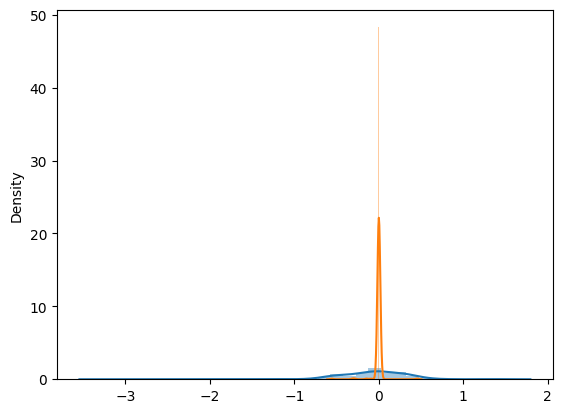

In [71]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [73]:
model1.get_weights()

[array([[-5.1872867e-01, -5.4124451e-01, -2.6615995e-01,  2.3782878e-01,
          3.3848727e-01, -3.5792232e-01, -4.8600912e-01, -4.9559343e-01,
          9.9248081e-02, -1.0271848e-01, -5.3433359e-01, -2.6830336e-01,
          5.9784103e-02, -6.6123182e-01, -5.2243388e-01,  5.1583771e-02,
         -7.9160500e-03,  3.9278975e-01,  5.1262889e-02, -9.3168713e-02,
         -5.1391840e-01,  6.4325988e-02, -2.0675729e-01,  2.5189012e-01,
         -5.2342522e-01,  8.3682321e-02, -5.9309912e-01,  2.3157693e-01,
         -1.6361235e-01,  2.6510833e-02, -5.4513121e-01,  1.4439344e-01,
          2.8558737e-01, -5.9917009e-01, -4.4487149e-01, -4.8956957e-02,
         -2.9774271e-02,  1.2588906e-02,  1.0756372e-02, -2.5453097e-01,
          2.6692864e-03, -8.5359037e-02,  3.6161175e-01,  2.5978512e-01,
         -1.9178367e-01,  5.3147223e-02, -5.5635369e-01, -3.0010414e-01,
          2.7548531e-01,  1.6696791e-01, -7.2893433e-02, -5.1216304e-01,
         -4.5909783e-01,  2.8477332e-01,  2.3340383

In [74]:
model1.get_weights()[0]

array([[-5.1872867e-01, -5.4124451e-01, -2.6615995e-01,  2.3782878e-01,
         3.3848727e-01, -3.5792232e-01, -4.8600912e-01, -4.9559343e-01,
         9.9248081e-02, -1.0271848e-01, -5.3433359e-01, -2.6830336e-01,
         5.9784103e-02, -6.6123182e-01, -5.2243388e-01,  5.1583771e-02,
        -7.9160500e-03,  3.9278975e-01,  5.1262889e-02, -9.3168713e-02,
        -5.1391840e-01,  6.4325988e-02, -2.0675729e-01,  2.5189012e-01,
        -5.2342522e-01,  8.3682321e-02, -5.9309912e-01,  2.3157693e-01,
        -1.6361235e-01,  2.6510833e-02, -5.4513121e-01,  1.4439344e-01,
         2.8558737e-01, -5.9917009e-01, -4.4487149e-01, -4.8956957e-02,
        -2.9774271e-02,  1.2588906e-02,  1.0756372e-02, -2.5453097e-01,
         2.6692864e-03, -8.5359037e-02,  3.6161175e-01,  2.5978512e-01,
        -1.9178367e-01,  5.3147223e-02, -5.5635369e-01, -3.0010414e-01,
         2.7548531e-01,  1.6696791e-01, -7.2893433e-02, -5.1216304e-01,
        -4.5909783e-01,  2.8477332e-01,  2.3340383e-01,  2.66467

In [75]:
model1.get_weights()[0].shape

(2, 128)

In [76]:
model1.get_weights()[0].reshape(256)

array([-5.1872867e-01, -5.4124451e-01, -2.6615995e-01,  2.3782878e-01,
        3.3848727e-01, -3.5792232e-01, -4.8600912e-01, -4.9559343e-01,
        9.9248081e-02, -1.0271848e-01, -5.3433359e-01, -2.6830336e-01,
        5.9784103e-02, -6.6123182e-01, -5.2243388e-01,  5.1583771e-02,
       -7.9160500e-03,  3.9278975e-01,  5.1262889e-02, -9.3168713e-02,
       -5.1391840e-01,  6.4325988e-02, -2.0675729e-01,  2.5189012e-01,
       -5.2342522e-01,  8.3682321e-02, -5.9309912e-01,  2.3157693e-01,
       -1.6361235e-01,  2.6510833e-02, -5.4513121e-01,  1.4439344e-01,
        2.8558737e-01, -5.9917009e-01, -4.4487149e-01, -4.8956957e-02,
       -2.9774271e-02,  1.2588906e-02,  1.0756372e-02, -2.5453097e-01,
        2.6692864e-03, -8.5359037e-02,  3.6161175e-01,  2.5978512e-01,
       -1.9178367e-01,  5.3147223e-02, -5.5635369e-01, -3.0010414e-01,
        2.7548531e-01,  1.6696791e-01, -7.2893433e-02, -5.1216304e-01,
       -4.5909783e-01,  2.8477332e-01,  2.3340383e-01,  2.6646772e-01,
      

In [77]:
model1.get_weights()[0].reshape(256).shape

(256,)